# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
367232               2020-08-07           2020-08-05            2020-07-25   
367233               2020-08-07           2020-08-05            2020-07-25   
367234               2020-08-07           2020-08-05            2020-07-25   
367235               2020-08-07           2020-08-05            2020-07-25   
367236               2020-08-07           2020-08-05            2020-07-25   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
367232             2020-07-25 00:00:00                   NaT   
367233             2020-07-25 00:00:00                   NaT   
367234             2020-07-25 00:00:00                   NaT   
367235             2020-07-25 00:00:00                   NaT   
367236             2020-07-25 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
367232                    NaT             Medellín        Antioquia      Leve   
367233                    NaT             Medellín        Antioquia      Leve   
367234                    NaT             Medellín        Antioquia      Leve   
367235                    NaT               Itagüí        Antioquia      Leve   
367236                    NaT             Medellín        Antioquia      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
367232            Casa  ...               20 - 30    M               NaN   
367233            Casa  ...               40 - 50    M               NaN   
367234            Casa  ...               60 - 70    F               NaN   
367235            Casa  ...               60 - 70    M               NaN   
367236            Casa  ...               40 - 50    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1082   1483
Antioquia                                           21722  25112
Arauca                                                 93    238
Archipiélago de San Andrés Providencia y Santa ...     18     30
Atlántico                                           11663  12940
Barranquilla D.E.                                   14962  17236
Bogotá D.C.                                         62689  63799
Bolívar                                              1319   1666
Boyacá                                                686    759
Buenaventura D.E.                                     815   1379
Caldas                                                595    595
Caquetá                                               981   1061
Cartagena D.T. y C.                                  7667   9249
Casanare                                              189    238
Cauca                                                1096   1395
Cesar                                                1837   2367
Chocó                                                1442   1710
Cundinamarca                                         5662   5610
Córdoba                                              4086   4159
Guainía                                                 7      8
Guaviare                                               15    111
Huila                                                 662    701
La Guajira                                           1240   1344
Magdalena                                            1240   1306
Meta                                                 1074   2528
Nariño                                               4258   4879
Norte de Santander                                   1665   2198
Putumayo                                              615    741
Quindío                                               240    240
Risaralda                                            1210   1182
Santa Marta D.T. y C.                                2659   2768
Santander                                            2500   3442
Sucre                                                3327   3792
Tolima                                               1157   2214
Valle del Cauca                                     13357  14820
Vaupés                                                 27     34
Vichada                                                 1      4

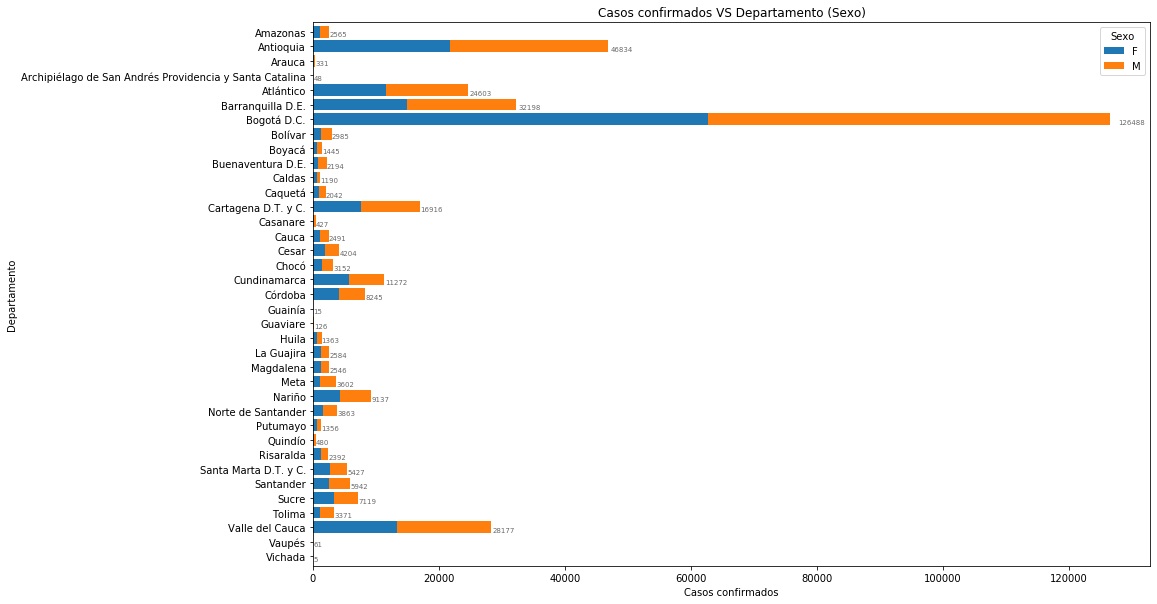

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               136      459      521   
Antioquia                                             1589     3219    12187   
Arauca                                                  16       60      107   
Archipiélago de San Andrés Providencia y Santa ...       0        1       14   
Atlántico                                             1115     1955     5251   
Barranquilla D.E.                                     1247     2128     7006   
Bogotá D.C.                                           5634     9603    28963   
Bolívar                                                149      283      679   
Boyacá                                                  76      144      293   
Buenaventura D.E.                                       48      286      504   
Caldas                                                  49       90      259   
Caquetá                                                 65      121      580   
Cartagena D.T. y C.                                    793     1254     3852   
Casanare                                                20       21      124   
Cauca                                                  106      203      578   
Cesar                                                  257      364      999   
Chocó                                                  133      278      754   
Cundinamarca                                           524      863     2625   
Córdoba                                                254      481     1699   
Guainía                                                  0        2        5   
Guaviare                                                 1       35       29   
Huila                                                   65      129      309   
La Guajira                                             141      250      540   
Magdalena                                              134      180      474   
Meta                                                    80      287     1096   
Nariño                                                 401      755     2133   
Norte de Santander                                     114      183      874   
Putumayo                                                40      122      396   
Quindío                                                 15       25      118   
Risaralda                                              144      215      547   
Santa Marta D.T. y C.                                  227      381     1194   
Santander                                              215      380     1380   
Sucre                                                  284      589     1480   
Tolima                                                 146      198      899   
Valle del Cauca                                        928     1836     6453   
Vaupés                                                   4        5       19   
Vichada                                                  0        4        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                490      348      285   
Antioquia                                             11780     7277     5624   
Arauca                                                   82       30       22   
Archipiélago de San Andrés Providencia y Santa ...       13       11        5   
Atlántico                                              5652     3910     3236   
Barranquilla D.E.                                      7617     5052     4328   
Bogotá D.C.                                           27956    20440    17181   
Bolívar                                                 688      416      279   
Boyacá                                                  277      238 

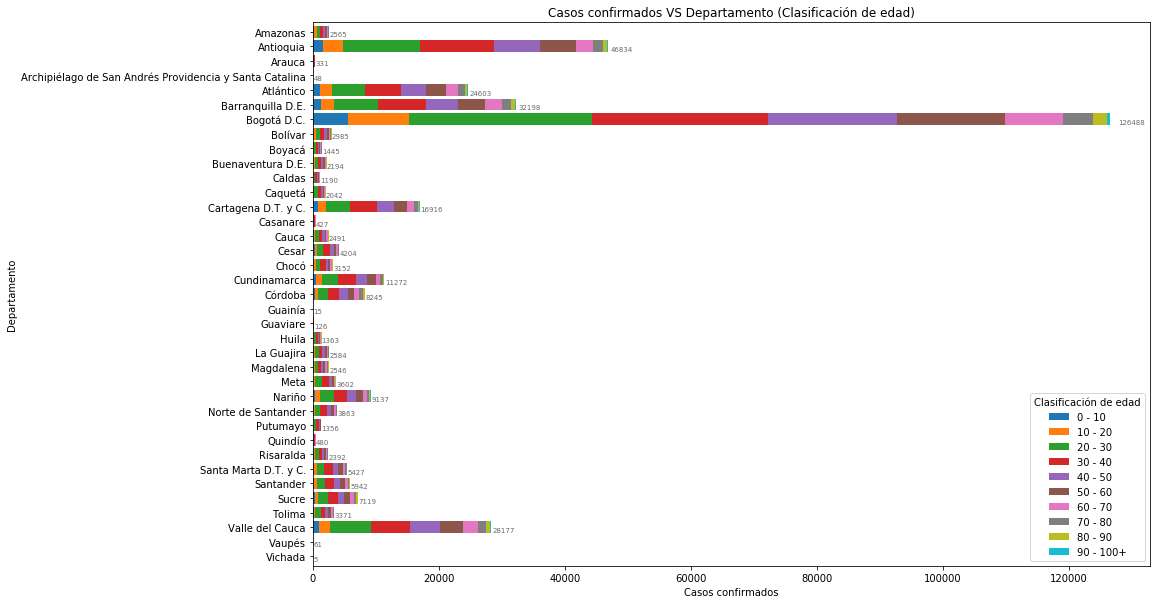

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               83.0      104.0   
Antioquia                                           25689.0      788.0   
Arauca                                                145.0        7.0   
Archipiélago de San Andrés Providencia y Santa ...     11.0        0.0   
Atlántico                                            4383.0     1122.0   
Barranquilla D.E.                                    4670.0     1527.0   
Bogotá D.C.                                         56484.0     3481.0   
Bolívar                                               937.0      134.0   
Boyacá                                                693.0       33.0   
Buenaventura D.E.                                     178.0      149.0   
Caldas                                                704.0       17.0   
Caquetá                                              1360.0       50.0   
Cartagena D.T. y C.                                  2546.0      482.0   
Casanare                                              211.0        6.0   
Cauca                                                 960.0       86.0   
Cesar                                                1839.0       83.0   
Chocó                                                 409.0      114.0   
Cundinamarca                                         4418.0      304.0   
Córdoba                                              3500.0      796.0   
Guainía                                                 1.0        1.0   
Guaviare                                               64.0        0.0   
Huila                                                 672.0       32.0   
La Guajira                                            756.0      140.0   
Magdalena                                             534.0      232.0   
Meta                                                 1358.0       50.0   
Nariño                                               2643.0      312.0   
Norte de Santander                                   2001.0      201.0   
Putumayo                                              776.0       59.0   
Quindío                                               227.0       11.0   
Risaralda                                            1297.0       44.0   
Santa Marta D.T. y C.                                2033.0      189.0   
Santander                                            3188.0      200.0   
Sucre                                                1969.0      393.0   
Tolima                                               1313.0       74.0   
Valle del Cauca                                      9238.0     1028.0   
Vaupés                                                  1.0        1.0   
Vichada                                                 3.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 7.0           4.0   
Antioquia                                             1741.0         181.0   
Arauca                                                  12.0           4.0   
Archipiélago de San Andrés Providencia y Santa ...       3.0           1.0   
Atlántico                                              533.0          66.0   
Barranquilla D.E.                                      757.0          66.0   
Bogotá D.C.                                           6342.0         410.0   
Bolívar                                                118.0          14.0   
Boyacá                                                  96.0           9.0   
Buenaventura D.E.                                      119.0          17.0   
Caldas                                                  46.0           5.0   
Caquetá                                                132.0           6.0   
Cartagena D.T. y C.  

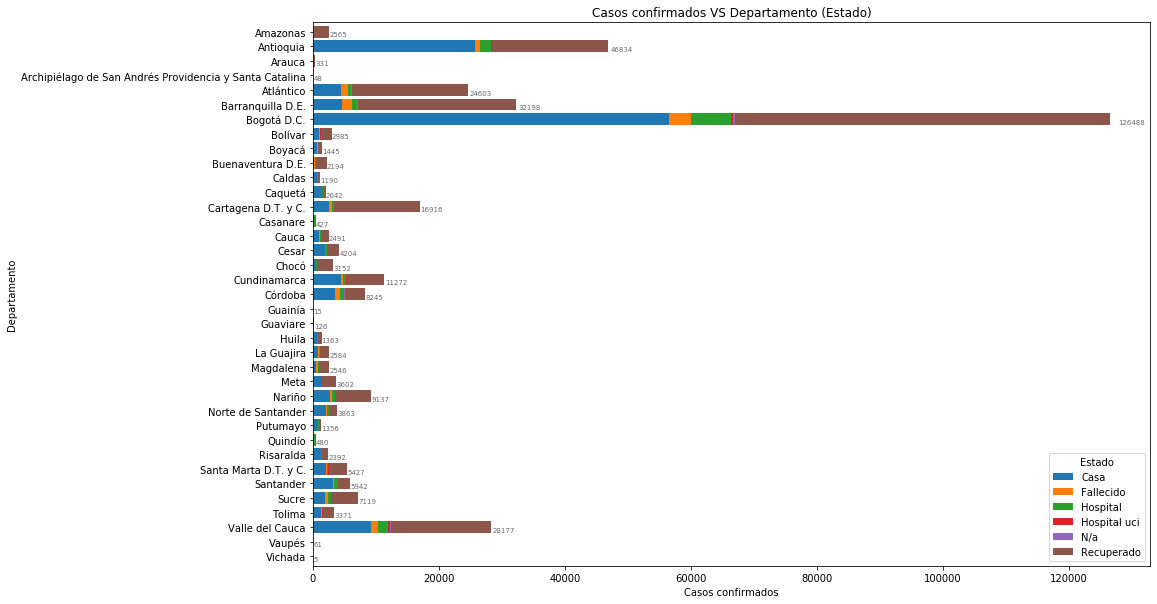

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Estado                     
Casa          67302   69992
Fallecido      4444    7806
Hospital       7132    9623
Hospital uci    564    1071
N/a             327     440
Recuperado    94089  104406

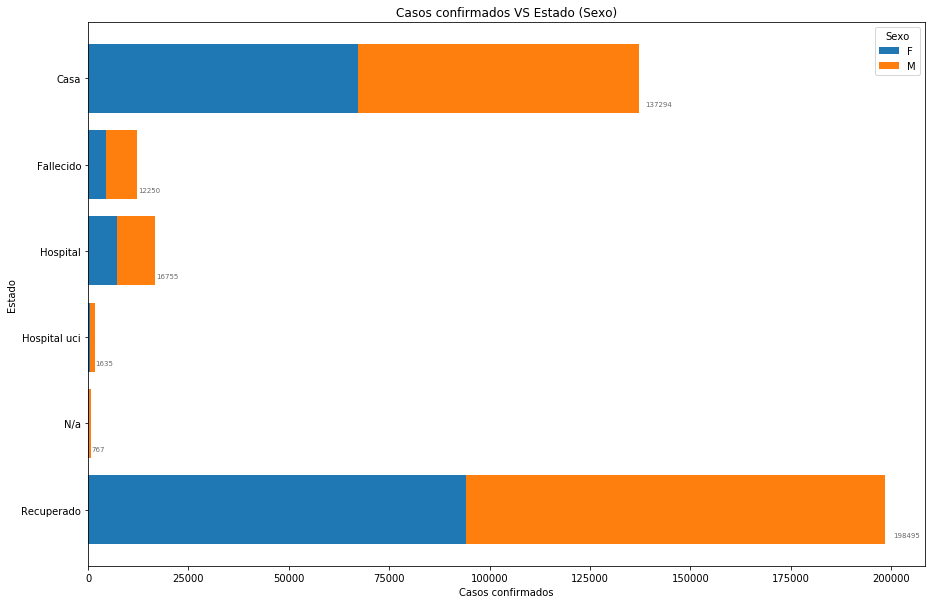

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     5632    10639    33944    33699    22392    17228   
Fallecido                  25       22      170      423      942     1861   
Hospital                  667      346     1224     1934     2487     3489   
Hospital uci               69       24       59      142      243      388   
N/a                        23       16       35       30       57       92   
Recuperado               8734    16342    49509    48683    31842    24146   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      8212     3794     1484        270  
Fallecido                 2935     3094     2264        514  
Hospital                  3282     2150     1030        146  
Hospital uci               381      259       65          5  
N/a                        158      167      145         44  
Recuperado               11784     5130     2014        311

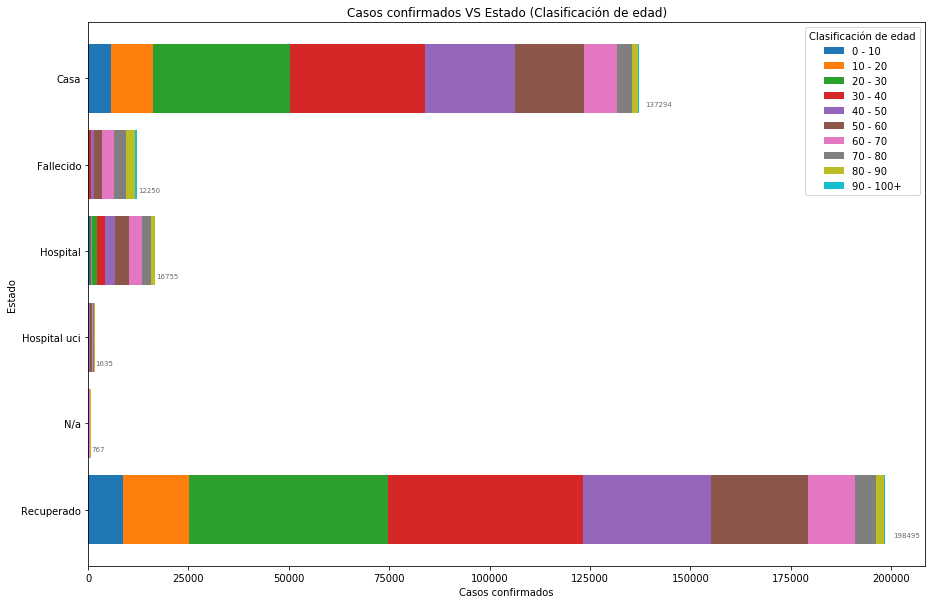

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   166916  177754
Importado       458     522
Relacionado    6484   15062

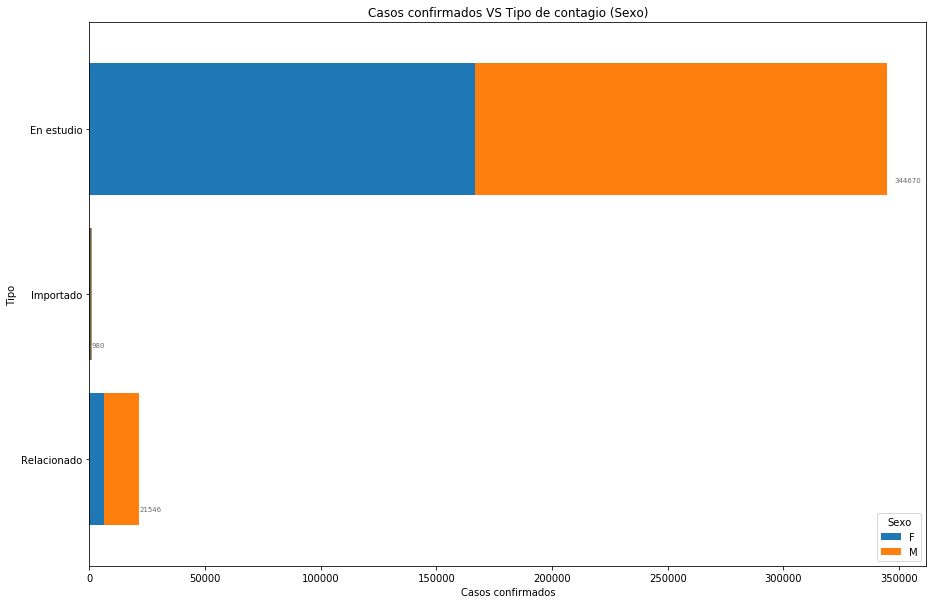

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              14224    24798    78724    79434    54892    44995   
Importado                   5       38      245      229      173      151   
Relacionado               921     2553     5972     5248     2898     2058   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               25614    14064     6703       1222  
Importado                   94       35        9          1  
Relacionado               1044      495      290         67

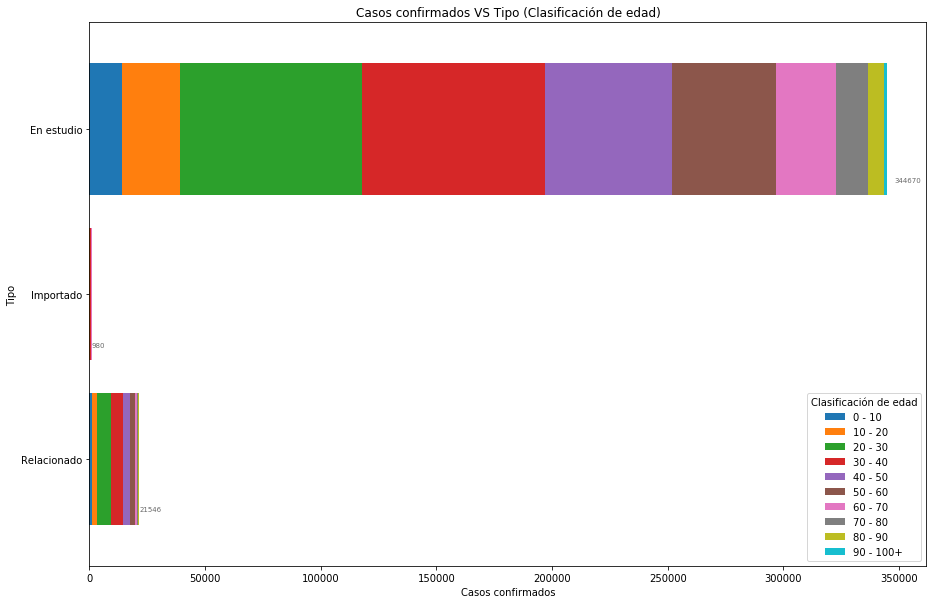

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  7393   7757
10 - 20                12795  14594
20 - 30                41159  43782
30 - 40                39581  45330
40 - 50                27486  30477
50 - 60                22228  24976
60 - 70                12352  14400
70 - 80                 6654   7940
80 - 90                 3470   3532
90 - 100+                740    550

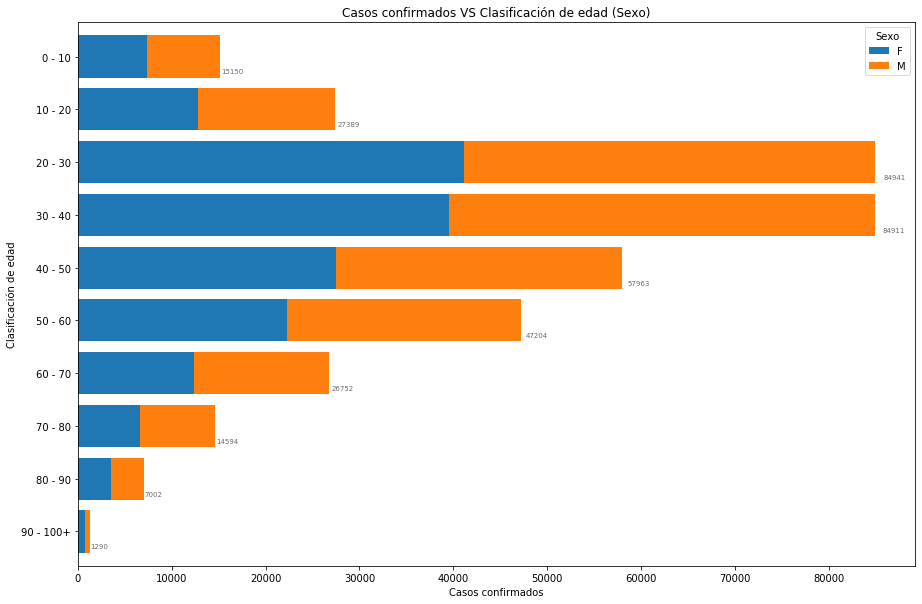

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  5632         25       667            69   23   
10 - 20                10639         22       346            24   16   
20 - 30                33944        170      1224            59   35   
30 - 40                33699        423      1934           142   30   
40 - 50                22392        942      2487           243   57   
50 - 60                17228       1861      3489           388   92   
60 - 70                 8212       2935      3282           381  158   
70 - 80                 3794       3094      2150           259  167   
80 - 90                 1484       2264      1030            65  145   
90 - 100+                270        514       146             5   44   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       8734  
10 - 20                     16342  
20 - 30                     49509  
30 - 40                     48683  
40 - 50                     31842  
50 - 60                     24146  
60 - 70                     11784  
70 - 80                      5130  
80 - 90                      2014  
90 - 100+                     311

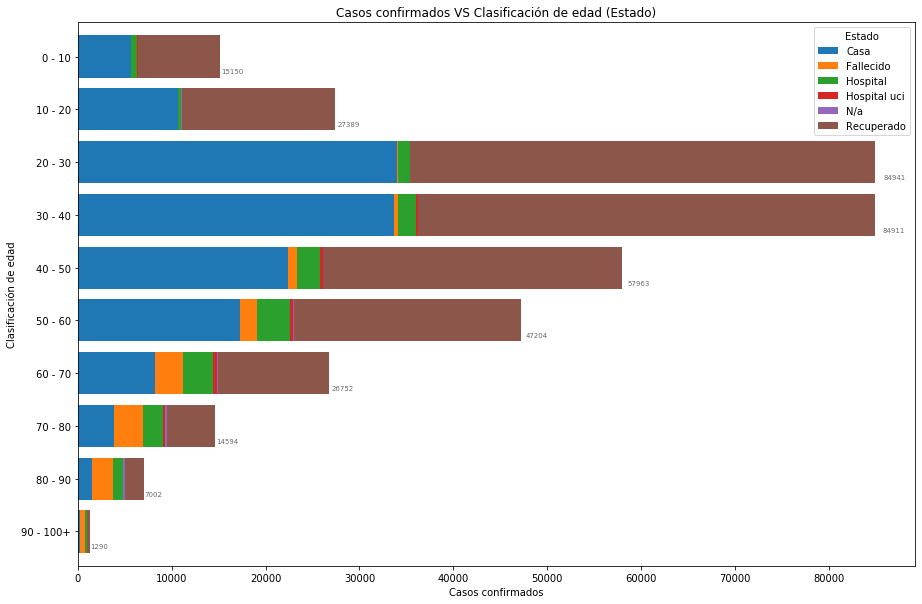

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-08-03            3936.0  4264.0
2020-08-04            5254.0  5412.0
2020-08-05            3899.0  3661.0
2020-08-06            2833.0  2707.0
2020-08-07             258.0   389.0

[152 rows x 2 columns]

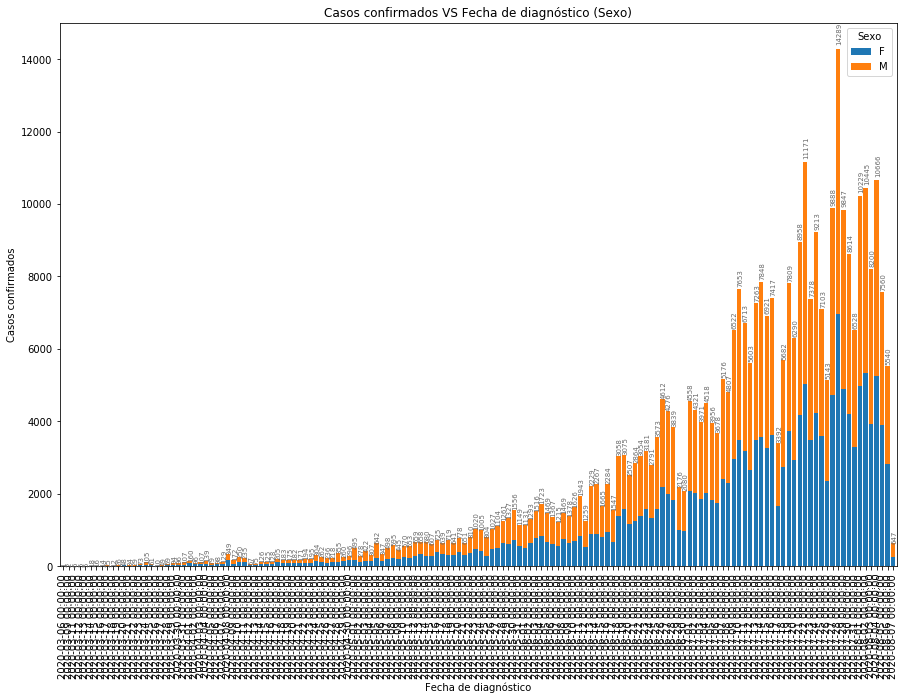

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-08-03                292      568     1849     1909     1252     1136   
2020-08-04                447      749     2451     2458     1750     1477   
2020-08-05                327      520     1710     1656     1207     1045   
2020-08-06                272      414     1198     1263      906      728   
2020-08-07                 21       50      181      157       96       75   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-08-03                 627      378      164         25  
2020-08-04                 754      380      174         26  
2020-08-05                 580      324      162         29  
2020-08-06                 383      242      112         22  
2020-08-07                  39       19        8          1  

[152 rows x 10 columns]

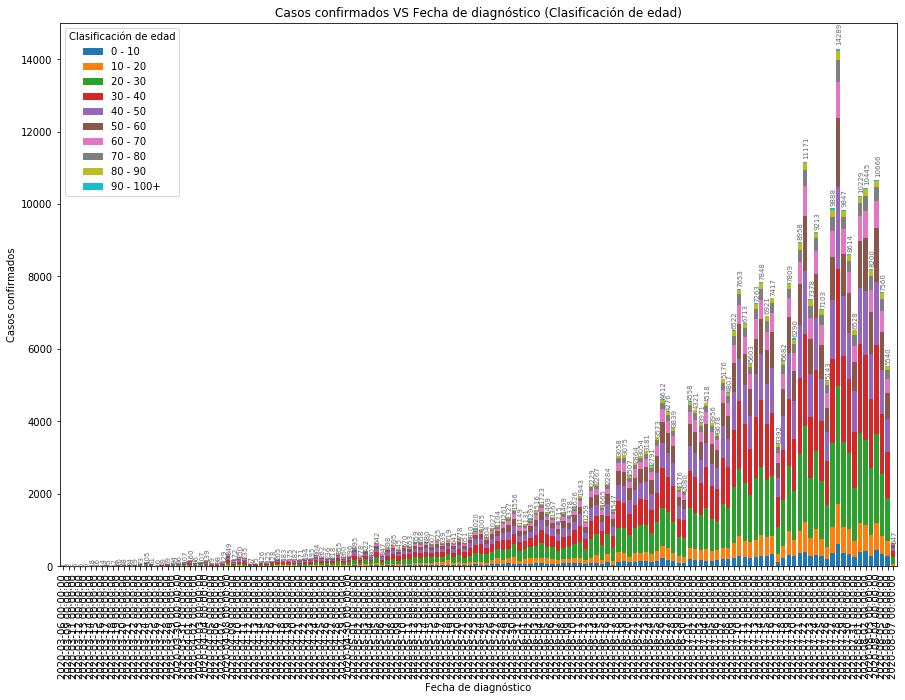

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                   Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                    
2020-03-06                0.0        0.0       0.0           0.0  0.0   
2020-03-09                0.0        0.0       0.0           0.0  0.0   
2020-03-11                0.0        0.0       0.0           0.0  0.0   
2020-03-12                0.0        0.0       0.0           0.0  0.0   
2020-03-13                0.0        0.0       0.0           0.0  0.0   
...                       ...        ...       ...           ...  ...   
2020-08-03             7521.0      131.0     520.0          21.0  7.0   
2020-08-04            10051.0      115.0     480.0          11.0  9.0   
2020-08-05             6989.0       85.0     468.0          16.0  2.0   
2020-08-06             5135.0       10.0     370.0          25.0  0.0   
2020-08-07              610.0        0.0      36.0           1.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-08-03                   0.0  
2020-08-04                   0.0  
2020-08-05                   0.0  
2020-08-06                   0.0  
2020-08-07                   0.0  

[152 rows x 6 columns]

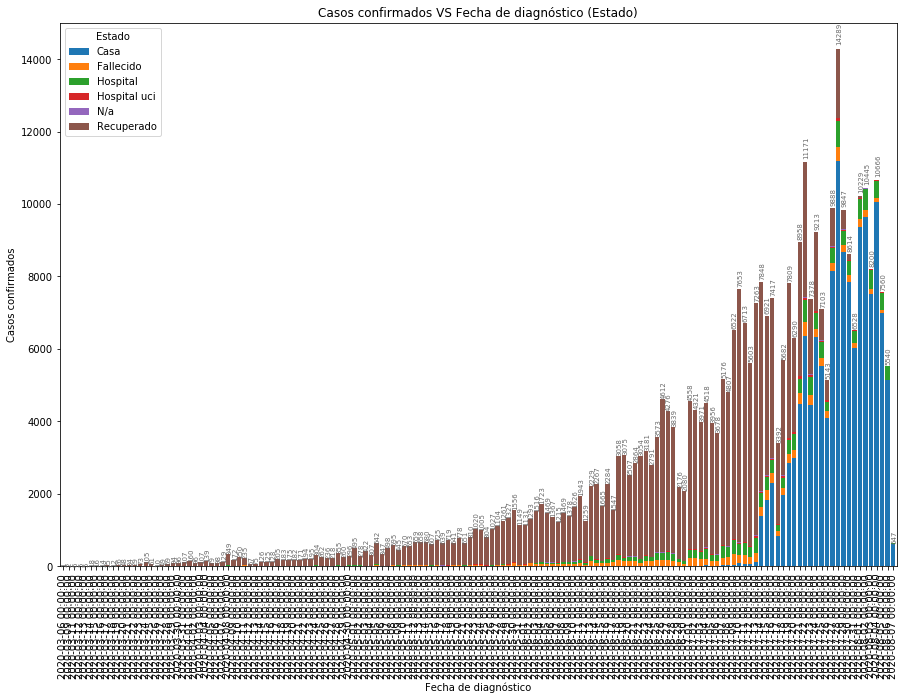

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-08-03            159832.0  179187.0
2020-08-04            165086.0  184599.0
2020-08-05            168985.0  188260.0
2020-08-06            171818.0  190967.0
2020-08-07            172076.0  191356.0

[152 rows x 2 columns]

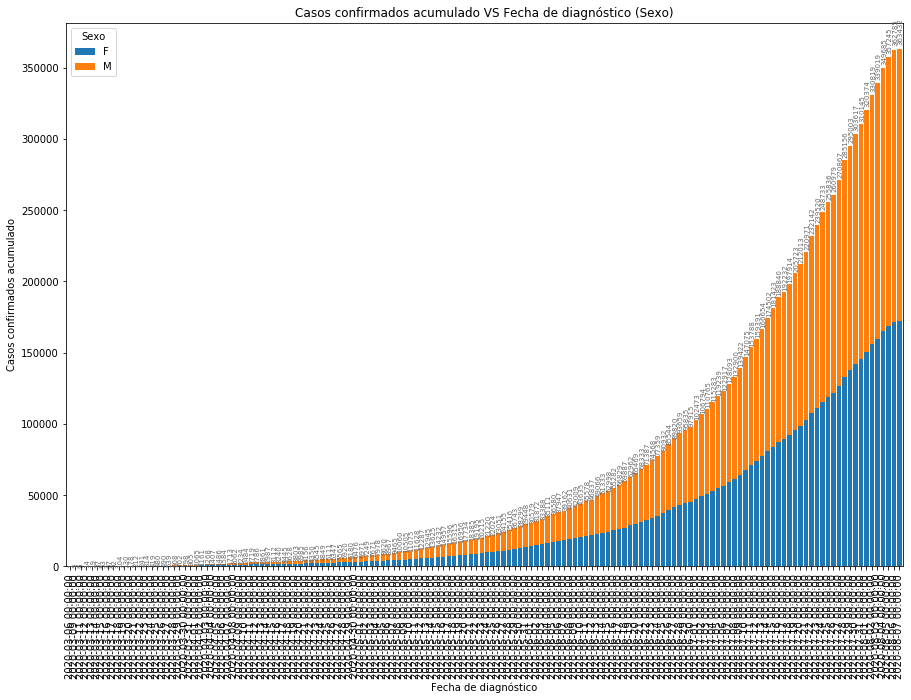

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-08-03              13950    25387    78511    78471    53450    43415   
2020-08-04              14397    26136    80962    80929    55200    44892   
2020-08-05              14724    26656    82672    82585    56407    45937   
2020-08-06              14996    27070    83870    83848    57313    46665   
2020-08-07              15017    27120    84051    84005    57409    46740   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-08-03               24702    13470     6461       1202  
2020-08-04               25456    13850     6635       1228  
2020-08-05               26036    14174     6797       1257  
2020-08-06               26419    14416     6909       1279  
2020-08-07               26458    14435     6917       1280  

[152 rows x 10 columns]

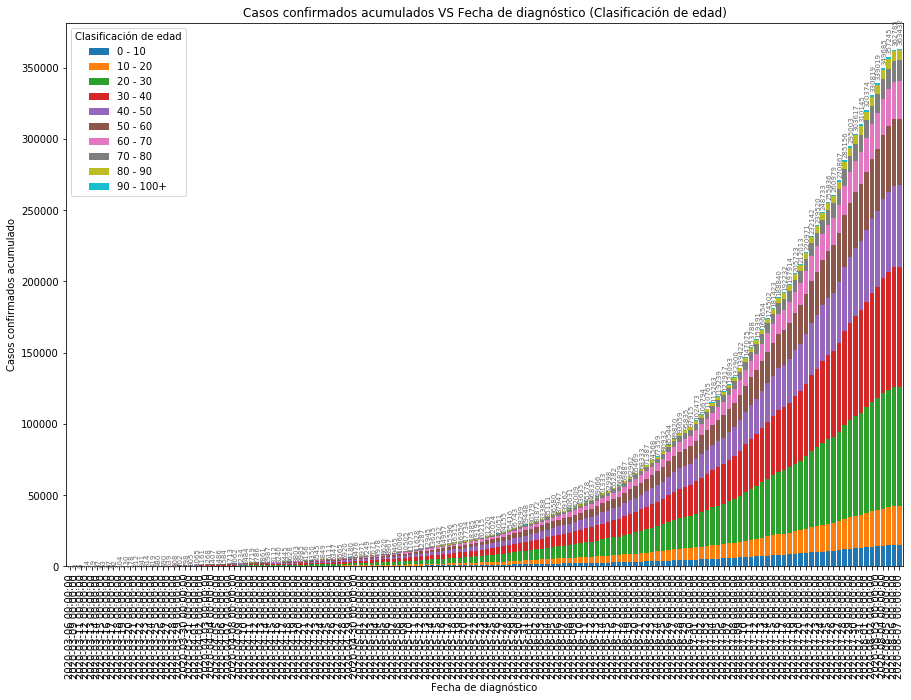

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-08-03            114474.0    11849.0   15271.0        1557.0  735.0   
2020-08-04            124525.0    11964.0   15751.0        1568.0  744.0   
2020-08-05            131514.0    12049.0   16219.0        1584.0  746.0   
2020-08-06            136649.0    12059.0   16589.0        1609.0  746.0   
2020-08-07            137259.0    12059.0   16625.0        1610.0  746.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-08-03              195133.0  
2020-08-04              195133.0  
2020-08-05              195133.0  
2020-08-06              195133.0  
2020-08-07              195133.0  

[152 rows x 6 columns]

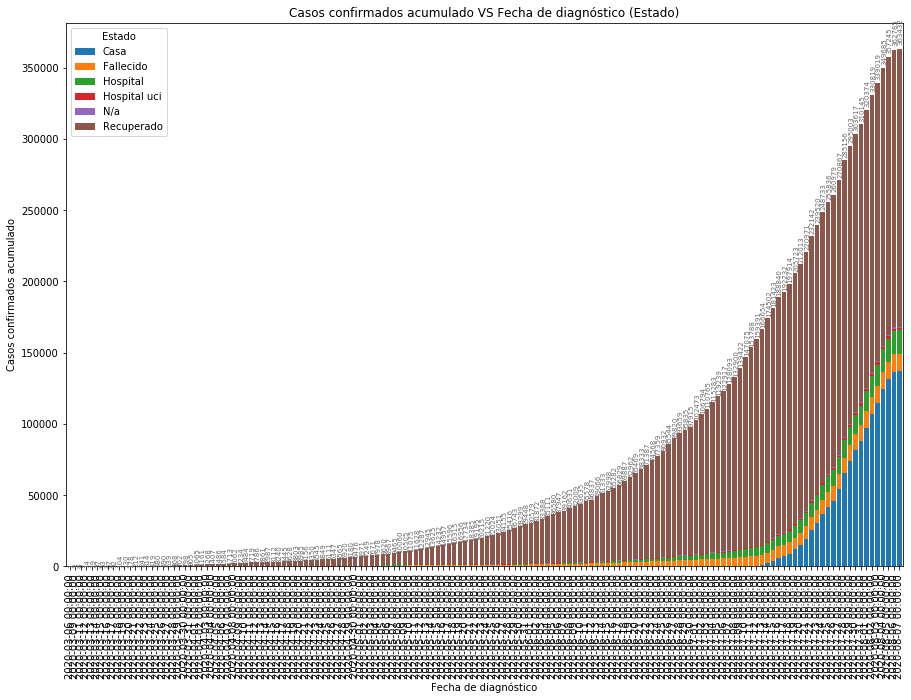

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>